# Point of Subjective Equality (PSE)

To examine the effect of experimental factors on the "Point of Subjective Equality (PSE)"


## Requirements


In [38]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(ggpubr)
    library(rstatix)
    library(dplyr)
    library(lme4)
    library(AICcmodavg)
    library(MuMIn)
    library(emmeans)
    library(patchwork)
}))

options(warn = -1) # turn-off warnings

## Data preparation

In [1]:
library(readxl)
setwd("C:/DataForR")
getwd()
data = read_excel("ProcessedData.xlsx", sheet = "BasicVars")
data

[1] "C:/DataForR"

subject No.,Axis Orientation,orientation No.,Rotation Condition,rotation No.,alpha1: descending transition point [SN],alpha2: ascending transition point [SN],PSE: point of subjective equality [SN],Hysteresis [SN],alpha1: descending transition point [AR],alpha2: ascending transition point [AR],PSE: point of subjective equality [AR],Hysteresis [AR]
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Orthogonal,0,without rotation,0,5.75,6.25,6.000,0.50,0.9181849,0.9575784,0.9378816,0.039393500
1,Orthogonal,0,with 90° rotation,1,8.50,9.00,8.750,0.50,1.1252976,1.1525000,1.1388988,0.027202375
1,Oblique,1,without rotation,0,7.25,7.25,7.250,0.00,1.0144047,1.0155953,1.0150000,0.001190500
1,Oblique,1,with 90° rotation,1,6.50,6.50,6.500,0.00,0.9761905,0.9761905,0.9761905,0.000000000
2,Orthogonal,0,without rotation,0,4.00,4.00,4.000,0.00,0.8057745,0.7996171,0.8026958,-0.006157375
2,Orthogonal,0,with 90° rotation,1,9.75,10.25,10.000,0.50,1.2125000,1.2875000,1.2500000,0.075000000
2,Oblique,1,without rotation,0,7.75,7.75,7.750,0.00,1.0400000,1.0427976,1.0413988,0.002797625
2,Oblique,1,with 90° rotation,1,6.25,6.00,6.125,-0.25,0.9627976,0.9494048,0.9561012,-0.013392875
3,Orthogonal,0,without rotation,0,6.50,6.25,6.375,-0.25,0.9750000,0.9627976,0.9688988,-0.012202375


In [40]:
# create a dataframe based on the required columns of data:
subject = data[,"subject No."]
AxisOrientation = data[,"Axis Orientation"]
orientation = data[,"orientation No."]
RotationCondition = data[,"Rotation Condition"]
rotation = data[,"rotation No."]
PSE = data[,"PSE: point of subjective equality [SN]"]
PSE_AR = data[,"PSE: point of subjective equality [AR]"]

mydata = data.frame(subject,AxisOrientation,orientation,RotationCondition,rotation,PSE,PSE_AR)
colnames(mydata) = c("subject","AxisOrientation","orientation","RotationCondition","rotation","PSE","PSE_AR")

# Convert into factor variables
mydata = mydata %>%
  convert_as_factor(subject,AxisOrientation,RotationCondition)

# set the levels:
mydata$AxisOrientation = factor(mydata$AxisOrientation, levels = c("Orthogonal", "Oblique"))
mydata$RotationCondition = factor(mydata$RotationCondition, levels = c("without rotation", "with 90° rotation"))

mydata

subject,AxisOrientation,orientation,RotationCondition,rotation,PSE,PSE_AR
<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
1,Orthogonal,0,without rotation,0,6.000,0.9378816
1,Orthogonal,0,with 90° rotation,1,8.750,1.1388988
1,Oblique,1,without rotation,0,7.250,1.0150000
1,Oblique,1,with 90° rotation,1,6.500,0.9761905
2,Orthogonal,0,without rotation,0,4.000,0.8026958
2,Orthogonal,0,with 90° rotation,1,10.000,1.2500000
2,Oblique,1,without rotation,0,7.750,1.0413988
2,Oblique,1,with 90° rotation,1,6.125,0.9561012
3,Orthogonal,0,without rotation,0,6.375,0.9688988


## summary statistics


In [41]:
mydata %>%
  group_by(AxisOrientation,orientation,RotationCondition,rotation) %>%
  get_summary_stats(PSE, type = "mean_sd")

AxisOrientation,orientation,RotationCondition,rotation,variable,n,mean,sd
<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
Orthogonal,0,without rotation,0,PSE,34,5.544,1.241
Orthogonal,0,with 90° rotation,1,PSE,34,8.890,1.151
Oblique,1,without rotation,0,PSE,34,7.092,0.899
Oblique,1,with 90° rotation,1,PSE,34,7.340,0.897


## Visualization

### PSE in terms of AR (Aspect Ratio)

In [42]:
# calculate mean, standard deviation and standard error:
PSE_AR.summary = mydata %>%
  group_by(AxisOrientation,RotationCondition) %>%
  summarise(
    mean = mean(PSE_AR),
    sd = sd(PSE_AR),
    se = sd(PSE_AR)/sqrt(34)
  )
PSE_AR.summary

`summarise()` has grouped output by 'AxisOrientation'. You can override using
the `.groups` argument.


AxisOrientation,RotationCondition,mean,sd,se
<fct>,<fct>,<dbl>,<dbl>,<dbl>
Orthogonal,without rotation,0.9073447,0.10365149,0.01777608
Orthogonal,with 90° rotation,1.1916005,0.12993423,0.02228354
Oblique,without rotation,1.0150102,0.06912561,0.01185494
Oblique,with 90° rotation,1.0358432,0.06791973,0.01164814


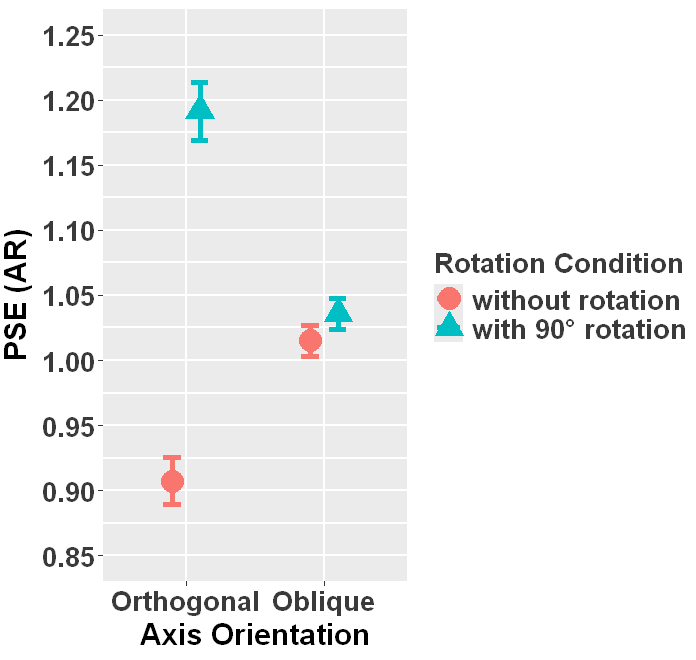

In [132]:
options(repr.plot.height=5.5, repr.plot.width=5.8)

ggplot(data = PSE_AR.summary, aes(x = AxisOrientation, y = mean)) +
    geom_errorbar(
        aes(ymin = mean-se, ymax = mean+se, color = RotationCondition, shape = RotationCondition), width=0.25, size=1.5,
        position = position_dodge(0.4), width = 0.25) +
    geom_point(aes(color = RotationCondition, shape = RotationCondition), position = position_dodge(0.4), size=6) + 
#   scale_shape_manual(values = c(17, 16, 15)) + 
    xlab("Axis Orientation") + ylab("PSE (AR)") +
    labs(shape = "Rotation Condition", color = "Rotation Condition") + 
    coord_cartesian(ylim = c(0.85,1.25)) +
    scale_y_continuous(breaks=c(0.85,0.90,0.95,1.00,1.05,1.10,1.15,1.20,1.25)) +
    theme(axis.title.x = element_text(size = 18, face="bold"),
          axis.title.y = element_text(size = 18, face="bold", vjust=2),
          axis.text.x  = element_text(size = 16, face="bold", color="#3a3a3a"),
          axis.text.y  = element_text(size = 16, face="bold", color="#3a3a3a"),
          legend.title = element_text(size = 16, face="bold", color="#3a3a3a"),
          legend.text  = element_text(size = 16, face="bold", color="#3a3a3a"),
          panel.grid.minor = element_line(colour = "white",size=0.8),
          panel.grid.major = element_line(colour = "white",size=0.8))
#     theme(legend.position='top')
    
# save plot:
ggsave("plot_PSE_A_AR.jpg", dpi = 300, height = 5.5, width = 5.8)

### PSE in terms of SN (Stimuli Number)

In [44]:
# calculate mean, standard deviation and standard error:
mydata.summary = mydata %>%
  group_by(AxisOrientation,RotationCondition) %>%
  summarise(
    mean = mean(PSE),
    sd = sd(PSE),
    se = sd(PSE)/sqrt(34)
  )
mydata.summary

`summarise()` has grouped output by 'AxisOrientation'. You can override using
the `.groups` argument.


AxisOrientation,RotationCondition,mean,sd,se
<fct>,<fct>,<dbl>,<dbl>,<dbl>
Orthogonal,without rotation,5.544118,1.2412124,0.2128662
Orthogonal,with 90° rotation,8.889706,1.1509074,0.1973790
Oblique,without rotation,7.091912,0.8987885,0.1541410
Oblique,with 90° rotation,7.340074,0.8973329,0.1538913


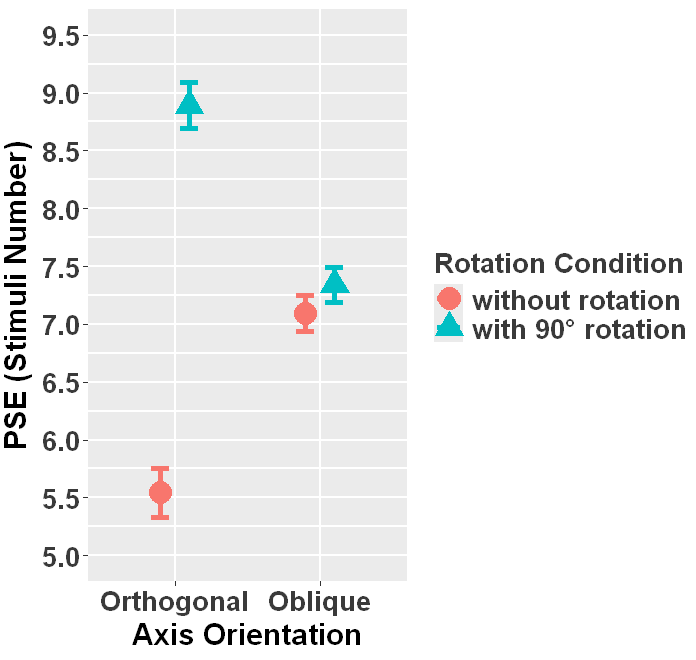

In [131]:
options(repr.plot.height=5.5, repr.plot.width=5.8)

ggplot(data = mydata.summary, aes(x = AxisOrientation, y = mean)) +
    geom_errorbar(
        aes(ymin = mean-se, ymax = mean+se, color = RotationCondition, shape = RotationCondition), width=0.25, size=1.5,
        position = position_dodge(0.4), width = 0.25) +
    geom_point(aes(color = RotationCondition, shape = RotationCondition), position = position_dodge(0.4), size=6) + 
#   scale_shape_manual(values = c(17, 16, 15)) + 
    xlab("Axis Orientation") + ylab("PSE (Stimuli Number)") +
    labs(shape = "Rotation Condition", color = "Rotation Condition") + 
    coord_cartesian(ylim = c(5,9.5)) +
    scale_y_continuous(breaks=c(5,5.5,6,6.5,7,7.5,8,8.5,9,9.5)) +
    theme(axis.title.x = element_text(size = 18, face="bold"),
          axis.title.y = element_text(size = 18, face="bold", vjust=2),
          axis.text.x  = element_text(size = 16, face="bold", color="#3a3a3a"),
          axis.text.y  = element_text(size = 16, face="bold", color="#3a3a3a"),
          legend.title = element_text(size = 16, face="bold", color="#3a3a3a"),
          legend.text  = element_text(size = 16, face="bold", color="#3a3a3a"),
          panel.grid.minor = element_line(colour = "white",size=0.8),
          panel.grid.major = element_line(colour = "white",size=0.8)) 
    
# save plot:
ggsave("plot_PSE_A_SN.jpg", dpi = 300, height = 5.5, width = 5.8)

# Mixed Effects Model

## Model Selection

In [46]:
# define models:
lme.Null                             = lmer(PSE ~ (1 + orientation + rotation | subject), REML = FALSE, data = mydata)
lme.Orientation                      = lmer(PSE ~ orientation + (1 + orientation + rotation | subject), REML = FALSE, data = mydata)
lme.Rotation                         = lmer(PSE ~ rotation + (1 + orientation + rotation | subject), REML = FALSE, data = mydata)
lme.Orientation_Rotation_Additive    = lmer(PSE ~ orientation + rotation + (1 + orientation + rotation | subject), REML = FALSE, data = mydata)
lme.Orientation_Rotation_NonAdditive = lmer(PSE ~ orientation*rotation + (1 + orientation + rotation | subject), REML = FALSE, data = mydata)

# run aictab:
modelsMS = list("null"                   = lme.Null,
                "orientation"            = lme.Orientation,
                "rotation"               = lme.Rotation,
                "orientation + rotation" = lme.Orientation_Rotation_Additive,
                "orientation*rotation"   = lme.Orientation_Rotation_NonAdditive)

output = aictab(cand.set = modelsMS)

# add evidence ratio
output$EvidenceRatio = output$AICcWt[1]/output$AICcWt

# add marginal and conditional R-squared:
for (x in 1:length(output$Modnames)) {
    m = output$Modnames[x]
    tmp = r.squaredGLMM(modelsMS[[m]])
    output$R2m[x] = tmp[1]
    output$R2c[x] = tmp[2]
}

output

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')



,Modnames,K,AICc,Delta_AICc,ModelLik,AICcWt,LL,Cum.Wt,EvidenceRatio,R2m,R2c
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,orientation*rotation,11,418.7216,0.00000,1.000000e+00,1.000000e+00,-197.2963,1,1.000000e+00,5.660201e-01,0.6188675
3,rotation,9,475.8268,57.10524,3.978830e-13,3.978830e-13,-228.1991,1,2.513302e+12,3.253445e-01,0.3636501
4,orientation + rotation,10,478.1582,59.43665,1.240212e-13,1.240212e-13,-228.1991,1,8.063137e+12,3.253425e-01,0.3636505
2,orientation,9,508.8605,90.13889,2.670477e-20,2.670477e-20,-244.7159,1,3.744649e+19,8.181113e-05,0.3621256
1,null,8,521.1608,102.43920,5.696539e-23,5.696539e-23,-252.0135,1,1.755452e+22,0.000000e+00,0.2418808


<div class="alert alert-block alert-success">
<b></b> 
    <font color='darkgreen'> In terms of Delta_AICc (<=4) and/or EvidenceRatio (<=10), the first model
    <font color='red'> is dominant
    <font color='darkgreen'> and will be selected as the best model 
</div>

### top model

In [47]:
modelTop.summary = summary(lme.Orientation_Rotation_NonAdditive)
modelTop.summary

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: PSE ~ orientation * rotation + (1 + orientation + rotation |  
    subject)
   Data: mydata

     AIC      BIC   logLik deviance df.resid 
   416.6    448.6   -197.3    394.6      125 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.60432 -0.55699 -0.08891  0.66831  2.64195 

Random effects:
 Groups   Name        Variance Std.Dev. Corr       
 subject  (Intercept) 0.00000  0.0000              
          orientation 0.05508  0.2347     NaN      
          rotation    0.34802  0.5899     NaN -1.00
 Residual             0.95431  0.9769              
Number of obs: 136, groups:  subject, 34

Fixed effects:
                     Estimate Std. Error t value
(Intercept)            5.5441     0.1675  33.092
orientation            1.5478     0.2403   6.440
rotation               3.3456     0.2576  12.986
orientation:rotation  -3.0974     0.3351  -9.244

Correlation of Fixed Effects:
            (Intr) ornttn 

In [48]:
# confidence intervals:
modelTop.confint = confint(lme.Orientation_Rotation_NonAdditive, level = 0.95) # method="Wald"
# integrate outputs:
cbind(modelTop.summary$coefficients, modelTop.confint[8:11,])

Computing profile confidence intervals ...



,Estimate,Std. Error,t value,2.5 %,97.5 %
(Intercept),5.544118,0.1675345,33.092398,5.212498,5.875738
orientation,1.547794,0.2403238,6.440453,1.072634,2.022954
rotation,3.345588,0.2576264,12.986199,2.836367,3.854810
orientation:rotation,-3.097426,0.3350690,-9.244146,-3.760382,-2.434381


<div class="alert alert-block alert-success">
<b></b> 
    <font color='darkgreen'> Significant fixed effects: 
    <font color='red'> intercept, orientation, rotation, orientation:rotation
</div>

## Post-hoc

### compare orientation*rotation pairs

In [49]:
# define the model:
lmePH.OrientationRotation = lmer(PSE ~ AxisOrientation*RotationCondition + (1 + orientation + rotation | subject), 
                      REML = FALSE, data = mydata)

# define the estimated marginal means:
emm.OrientationRotation = emmeans(lmePH.OrientationRotation, list(pairwise ~ AxisOrientation*RotationCondition), adjust = "tukey")

# pairwise comparisions:
a = summary(pairs(emm.OrientationRotation))

# confidence intervals:
b = summary(confint(emm.OrientationRotation, level = 0.95))

# integrate the results:
c = cbind(a, b$`pairwise differences of AxisOrientation, RotationCondition`[,c("lower.CL","upper.CL")])
c

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')



,contrast,estimate,SE,df,t.ratio,p.value,lower.CL,upper.CL
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Orthogonal without rotation - Oblique without rotation,-1.5477941,0.2439379,70.00553,-6.3450337,1.135515e-07,-2.1897974,-0.9057908
2,Orthogonal without rotation - Orthogonal with 90° rotation,-3.3455882,0.2615007,68.43301,-12.7938003,0.000000e+00,-4.0341982,-2.6569782
3,Orthogonal without rotation - Oblique with 90° rotation,-1.7959559,0.2483161,35.03030,-7.2325403,1.123887e-07,-2.4656117,-1.1263001
4,Oblique without rotation - Orthogonal with 90° rotation,-1.7977941,0.2800758,35.03030,-6.4189565,1.266569e-06,-2.5530991,-1.0424891
5,Oblique without rotation - Oblique with 90° rotation,-0.2481618,0.2615007,68.43301,-0.9489907,7.785370e-01,-0.9367718,0.4404482
6,Orthogonal with 90° rotation - Oblique with 90° rotation,1.5496324,0.2439379,70.00553,6.3525694,1.100816e-07,0.9076291,2.1916357


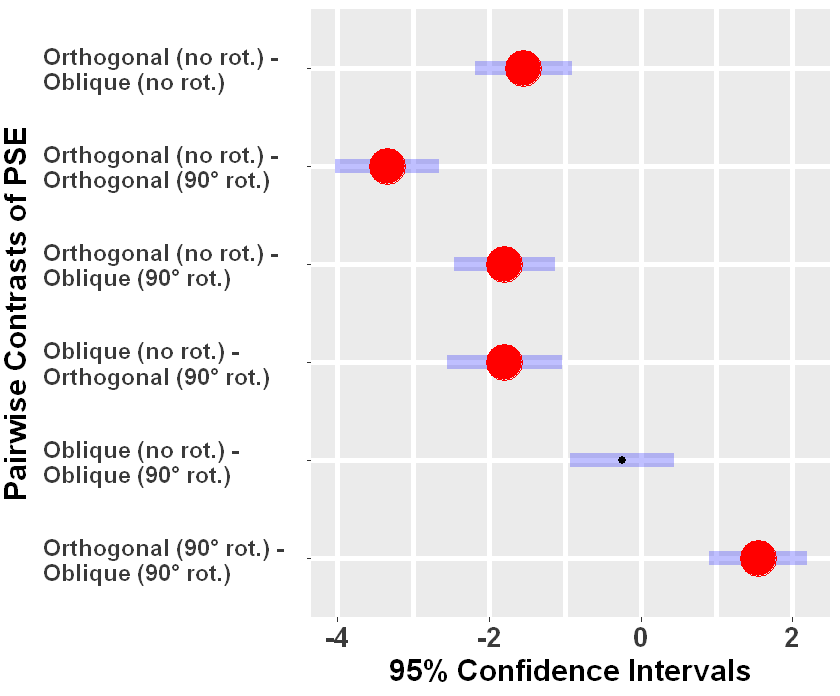

In [133]:
# draw the confidence intervals of contrasts:
options(repr.plot.height=5.8, repr.plot.width=7)
p = plot(pairs(emm.OrientationRotation, comparisons = TRUE))

# set the confidence intervals:
p$data$lcl = c$lower.CL
p$data$ucl = c$upper.CL

# set point sizes:
tmp = summary(pairs(emm.OrientationRotation))
point_size = pmax(pmin(log(1/tmp$p.value,2),10),1)

# set point colors:
point_color = rep("black", length(point_size))
point_color[(p$data$lcl>0 & p$data$ucl>0) | (p$data$lcl<0 & p$data$ucl<0)] = "red"

# set plot properties:
plot.OrientationRotation = p + 
    geom_point(size = point_size, color = point_color) + 
    xlab("95% Confidence Intervals") + ylab("Pairwise Contrasts of PSE") + 
#     scale_y_discrete(limits = rev) + 
    theme(axis.title.x = element_text(size = 18, face="bold"),
          axis.title.y = element_text(size = 18, face="bold", vjust = 2),
          axis.text.x  = element_text(size = 16, face="bold", color="#3a3a3a"),
          axis.text.y  = element_text(size = 14, face="bold", color="#3a3a3a", hjust = 0),
          legend.title = element_text(size = 16, face="bold", color="#3a3a3a"),
          legend.text  = element_text(size = 16, face="bold", color="#3a3a3a"),
          panel.grid.minor = element_line(colour = "white",size=1.5),
          panel.grid.major = element_line(colour = "white",size=1.5)) + 
    scale_y_discrete(limits = rev, 
                     labels = c("Orthogonal (90° rot.) - \nOblique (90° rot.)",
                                "Oblique (no rot.) - \nOblique (90° rot.)",
                                "Oblique (no rot.) - \nOrthogonal (90° rot.)",
                                "Orthogonal (no rot.) - \nOblique (90° rot.)",
                                "Orthogonal (no rot.) - \nOrthogonal (90° rot.)",
                                "Orthogonal (no rot.) - \nOblique (no rot.)"))

plot.OrientationRotation

# save plot:
ggsave("plot_PSE_B.jpg", dpi = 300, height = 5.8, width = 7)